In [87]:
import pickle
import pandas as pd
import numpy as np

import importlib
import matplotlib.pyplot as plt

from pos_tagging.tag_datasets import TagData
from pos_tagging.models import PosTagger
from pos_tagging.tag_datasets import DataHandling

importlib.reload(TagData)
importlib.reload(PosTagger)
importlib.reload(DataHandling)

TagDataset = TagData.TagDataset

In [88]:
trainData = TagDataset('./data/UD_English-Atis/en_atis-ud-train.conllu')
print("Vocabulary size:", len(trainData.vocabulary))
print("Number of Classes", len(trainData.classes))

devData = TagDataset('./data/UD_English-Atis/en_atis-ud-dev.conllu')

Vocabulary size: 865
Number of Classes 13


In [89]:
posTagger = PosTagger.LstmPosTagger(trainData,
                                   devData,
                                   activation='tanh',
                                   embeddingSize=128,
                                   batchSize=32,
                                   hiddenSize=64,
                                   numLayers=3,
                                   bidirectional=True,
                                   linearHiddenLayers=[32])

posTagger.train(epochs=15, learningRate=2e-3, verbose=True)

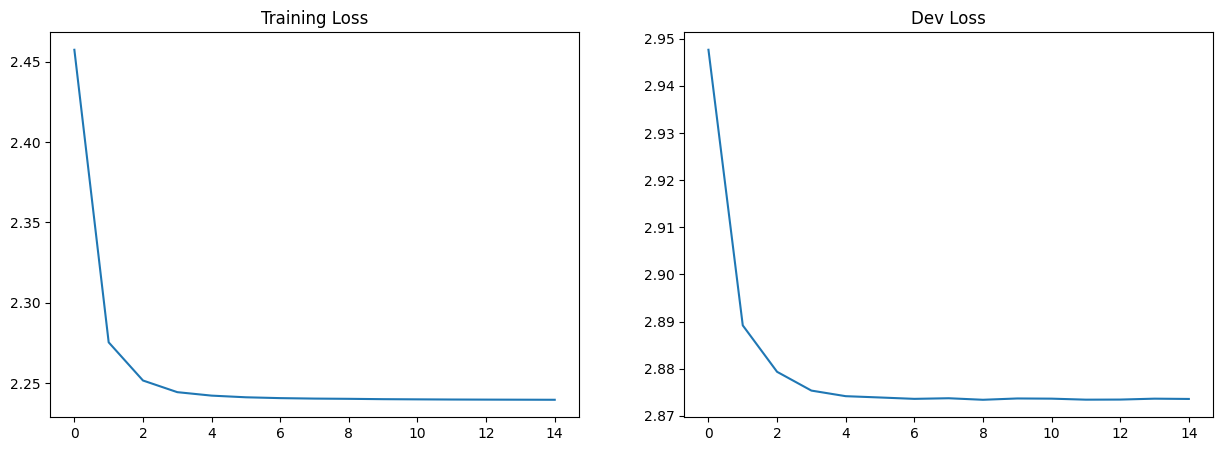

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(posTagger.trainLoss)
ax[1].plot(posTagger.devLoss)
ax[0].set_title('Training Loss')
ax[1].set_title('Dev Loss')
plt.show()

In [91]:
testData = TagDataset('./data/UD_English-Atis/en_atis-ud-test.conllu')
i = np.random.randint(0, len(testData.dataset))

sentence = [ word[1] for word in testData.dataset[i] ]
preds = posTagger.predict(sentence)
print(sentence)
print(preds)
print([word[2] for word in testData.dataset[i]])

['what', 'first', 'class', 'airplane', 'goes', 'from', 'philadelphia', 'to', 'san', 'francisco', 'and', 'stops', 'in', 'dallas', 'in', 'the', 'afternoon', 'on', 'monday']
['PRON', 'ADV', 'NOUN', 'NOUN', 'VERB', 'ADP', 'PROPN', 'PART', 'PROPN', 'PROPN', 'CCONJ', 'AUX', 'ADP', 'PROPN', 'ADP', 'DET', 'NOUN', 'ADP', 'NOUN']
['DET', 'ADV', 'NOUN', 'NOUN', 'VERB', 'ADP', 'PROPN', 'ADP', 'PROPN', 'PROPN', 'CCONJ', 'VERB', 'ADP', 'PROPN', 'ADP', 'DET', 'NOUN', 'ADP', 'NOUN']


In [92]:
posTagger.evaluateModel(testData)
print(posTagger.classificationReport)
print(posTagger.scores)

              precision    recall  f1-score   support

         ADJ       0.59      0.83      0.69       220
         ADP       1.00      0.84      0.91      1434
         ADV       0.45      0.70      0.55        76
         AUX       0.82      0.97      0.89       256
       CCONJ       0.49      0.94      0.64       109
         DET       0.92      0.93      0.92       512
        INTJ       0.19      1.00      0.32        36
        NOUN       0.99      0.89      0.94      1166
         NUM       0.42      0.85      0.56       127
        PART       0.21      1.00      0.34        56
        PRON       0.92      0.98      0.95       392
       PROPN       1.00      0.78      0.88      1567
        VERB       0.98      0.78      0.87       629

    accuracy                           0.85      6580
   macro avg       0.69      0.88      0.73      6580
weighted avg       0.93      0.85      0.88      6580

{'accuracy': 0.8522796352583587, 'precision': 0.9261783100558664, 'recall': 0.8

In [93]:
posTagger.evaluateModel(trainData)
print(posTagger.classificationReport)

              precision    recall  f1-score   support

         ADJ       0.61      0.83      0.70      1632
         ADP       1.00      0.83      0.91     10791
         ADV       0.48      0.84      0.61       431
         AUX       0.82      0.97      0.89      1732
       CCONJ       0.52      0.96      0.67       751
         DET       0.93      0.93      0.93      3805
        INTJ       0.22      0.99      0.36       319
        NOUN       1.00      0.89      0.94      8621
         NUM       0.44      0.90      0.59       933
        PART       0.17      0.99      0.29       366
        PRON       0.94      0.96      0.95      3022
       PROPN       1.00      0.79      0.88     11657
        VERB       0.98      0.84      0.90      4595

    accuracy                           0.86     48655
   macro avg       0.70      0.90      0.74     48655
weighted avg       0.93      0.86      0.88     48655



In [94]:
posTagger.evaluateModel(devData)
print(posTagger.classificationReport)

              precision    recall  f1-score   support

         ADJ       0.60      0.83      0.69       227
         ADP       0.99      0.86      0.92      1415
         ADV       0.50      0.86      0.64        59
         AUX       0.83      0.95      0.89       266
       CCONJ       0.51      0.98      0.68       107
         DET       0.95      0.91      0.93       568
        INTJ       0.19      1.00      0.32        35
        NOUN       0.99      0.90      0.94      1143
         NUM       0.44      0.86      0.59       131
        PART       0.26      0.97      0.41        73
        PRON       0.94      0.98      0.96       414
       PROPN       1.00      0.79      0.88      1551
         SYM       0.00      0.00      0.00         2
        VERB       0.97      0.81      0.88       653

    accuracy                           0.86      6644
   macro avg       0.66      0.84      0.69      6644
weighted avg       0.93      0.86      0.88      6644



# Hyperparameter Tuning

In [95]:
# hiddenLayerss = [ [], [16], [32], [64], [16, 16], [32, 16] ]
# embeddingSizes = [ 64, 128, 256 ]
# activations = [ 'relu', 'sigmoid', 'tanh' ]
# contextSizes = [ 0, 1, 2, 3, 4 ]
# epochss = [ 15, 30, 45 ]
# lrs = [ 1e-1, 1e-2, 1e-3 ]
# modelScores = {}

# for hiddenlayers in hiddenLayerss:
#     for embeddingSize in embeddingSizes:
#         for activation in activations:
#             for contextSize in contextSizes:
#                 for epochs in epochss:
#                     for lr in lrs:
#                         posTagger = PosTagger.AnnPosTagger(trainData,
#                                                            devData,
#                                                            contextSize=contextSize,
#                                                            activation=activation,
#                                                            embeddingSize=embeddingSize,
#                                                            hiddenLayers=hiddenlayers,
#                                                            batchSize=128)
#                         posTagger.train(epochs=epochs, learningRate=lr)
#                         key = str( [hiddenlayers, embeddingSize, activation, contextSize, epochs, lr] )
#                         modelScores[key] = {}
#                         modelScores[key]['dev'] = posTagger.evaluateModel(devData)
#                         modelScores[key]['train'] = posTagger.evaluateModel(trainData)
#                         modelScores[key]['test'] = posTagger.evaluateModel(testData)

# # save the modelScores dictionary to a file
# with open('model_scores.pkl', 'wb') as file:
#     pickle.dump(modelScores, file)

In [96]:
# # top 10 models
# top10Models = sorted(modelScores.items(), key=lambda x: x[1]['test']['f1'], reverse=True)[:10]

# print(top10Models)